The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

•	Introversion (I) – Extroversion (E)

•	Intuition (N) – Sensing (S)

•	Thinking (T) – Feeling (F)

•	Judging (J) – Perceiving (P)


Personality type is a detailed classification of the innate characteristics that make someone who they are. 

There are a total of 16 personality types. 

Many of today’s theories of psychological typology are based on the work of Swiss psychiatrist Carl Jung, who wrote Psychological Types in 1921, and the research of Isabel Briggs Myers and Katharine Cook Briggs. Jung was the founder of analytical psychology, which studies the motivations underlying human behavior.

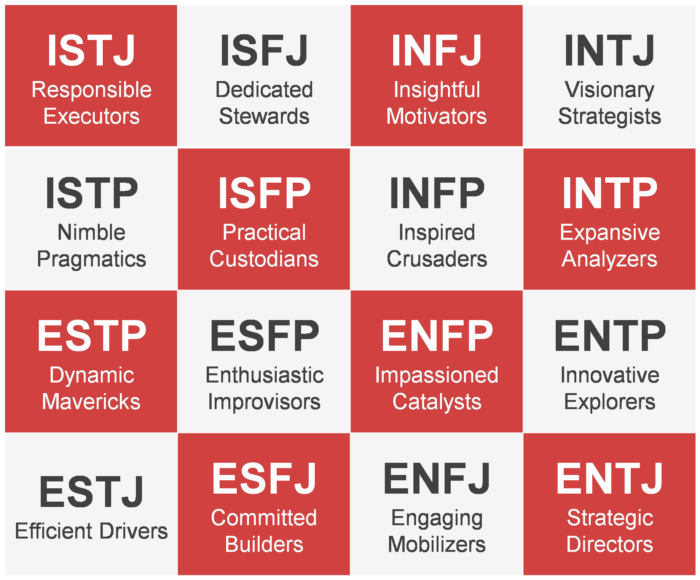

No personality type is better than another. Each person has a unique set of equally valuable characteristics. Understanding one's type can be useful in many ways, including relationships, career and learning.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_csv("mbti_1.csv")

Read the data from the csv into a dataframe

Extraversion is characterized by a preference to focus on the world outside the self. Extraverts are energized by social gatherings, parties and group activities. 
Extravert Characteristics
•	Gregarious
•	Assertive
•	Talkative
•	Social/outgoing
•	Likes groups, parties, etc.
•	Energized by interaction
•	Expressive & enthusiastic
•	Volunteers personal information
•	Distractable
•	Has many friends
•	Easy to approach

Introversion is characterized by a preference to focus on the inside world. Introverts are energized by spending time alone or with a small group. 
Introvert Characteristics
•	Energized by time alone
•	Private
•	Keeps to self
•	Quiet
•	Deliberate
•	Internally aware
•	Fewer friends
•	Prefer smaller groups
•	Independent
•	Not socially inclined
•	Enjoys solitude


Intuitive people live in the future and are immersed in the world of possibilities. They process information through patterns and impressions. 
Intuitive Characteristics
•	Future-focused
•	Sees possibilities
•	Inventive
•	Imaginative
•	Deep
•	Abstract
•	Idealistic
•	Theoretical


Sensors focus on the present. They are “here and now” people. They are factual and process information through the five senses. 
Sensing Characteristics
•	Concrete
•	Realistic
•	Lives in the present
•	Aware of surroundings
•	Notices details
•	Practical
•	Goes by senses
•	Factual


Thinking people are objective. They make decisions based on facts. They are ruled by their head instead of their heart. Thinking people judge situations and others based on logic.
Thinking Characteristics
•	Logical
•	Objective
•	Decides with head
•	Wants truth
•	Rational
•	Impersonal
•	Critical
•	Thick-skinned
•	Firm with people


Feeling people are subjective. They make decisions based on principles and values. They are ruled by their heart instead of their head
Feeling Characteristics
•	Decides with heart
•	Dislikes conflict
•	Passionate
•	Driven by emotion
•	Gentle
•	Easily hurt
•	Empathetic
•	Caring of others
•	Warm


Judging Characteristics
•	Decisive
•	Controlled
•	Good at finishing
•	Organized
•	Structured
•	Scheduled
•	Quick at tasks
•	Responsible
•	Likes closure
•	Makes plans



Perceivers are adaptable and flexible. They are random thinkers who prefer to keep their options open. Perceivers thrive with the unexpected and are open to change. 
Perceiving Characteristics
•	Adaptable
•	Relaxed
•	Disorganized
•	Care-free
•	Spontaneous
•	Changes tracks midway
•	Keeps options open
•	Procrastinates
•	Dislikes routine
•	Flexible



count = 0
for txt in data.iloc[10,1].split('|||'):
    if txt.startswith('http:'):
        count += 1
        
count
        

In [3]:
df.dtypes

type     object
posts    object
dtype: object

In [4]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'I am 100% sure Murakami is INFJ. Wish people ...
freq,1832,1


In [5]:
missing_values_count = df.isnull().sum()

In [6]:
missing_values_count[:]

type     0
posts    0
dtype: int64

There are no Missing values in the dataset. :)

In [7]:
def no_links(inposts):
    count = 0 
    d=inposts.split('|||')
    t=[]
    for txt in d:
        t.extend(txt.split('  '))
    for text in t: 
        if 'http' in text:
            #print(text,'\n')
            count+=1
    return count

In [8]:
#x=no_links(df['posts'])

In [9]:
df['no.of.links']=np.vectorize(no_links)(df['posts'])

In [10]:
df

,type,posts,no.of.links
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,24
1,ENTP,'I'm finding the lack of me in these posts ver...,7
2,INTP,'Good one _____ https://www.youtube.com/wat...,5
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",2
4,ENTJ,'You're fired.|||That's another silly misconce...,6
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,1
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",2
7,INTJ,'I tend to build up a collection of things on ...,1
8,INFJ,"I'm not sure, that's a good question. The dist...",23
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,7


count = 0 
d=df.iloc[382,1].split('|||')
t=[]
for txt in d:
    t.extend(txt.split('  '))
len(t)

count = 0
for text in t: 
    if 'http' in text:
        print(text,'\n')
        count+=1

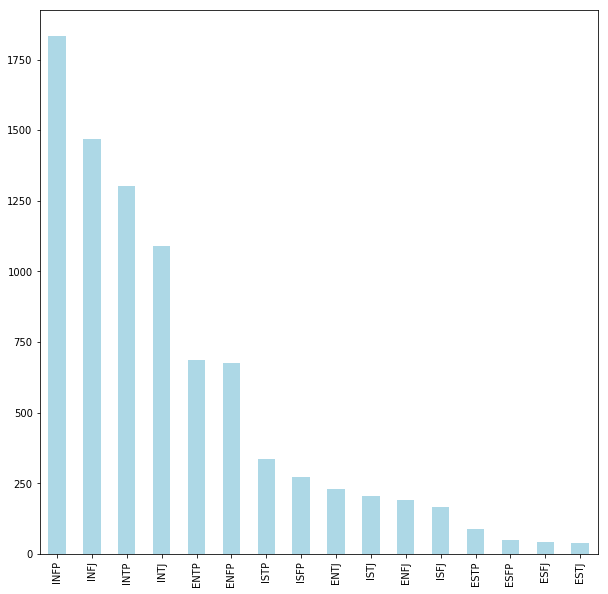

In [11]:
df['type'].value_counts().plot(kind='bar', color='lightblue',figsize=(10,10))

There are more instances of type INFP. The dataset is biased towards it.

Checking out which type is least represented in the dataset...

In [12]:
df.groupby('type').agg({'type':'count'})

,type
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


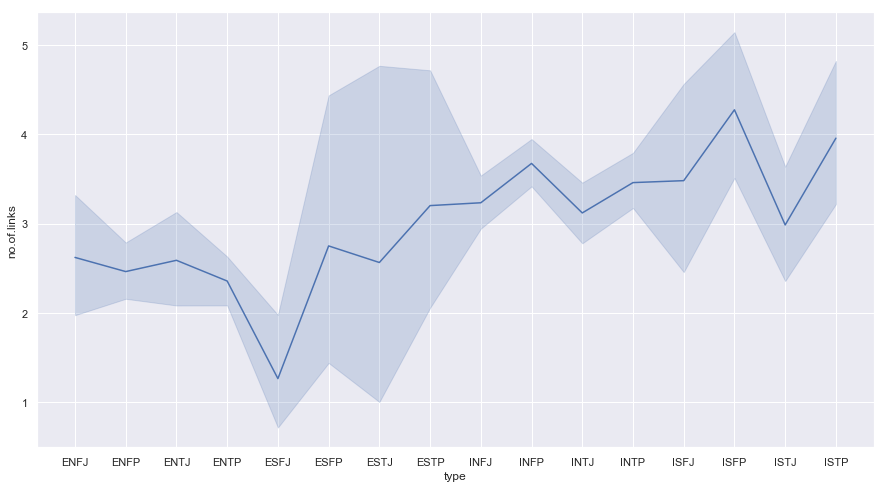

In [13]:
sns.set()
plt.figure(figsize=(15,8))
ax = sns.lineplot(x="type", y="no.of.links", data=df, sizes=(10,10))
#ax.set_size_inches(10,10)

no.of.links describe the types : ENFP, ENTP, INFJ, INFP, INTJ, INTP

    Their common characteristic is: N .i.e. Intuitive people who process information through patterns and impressions. 
    They are Imaginative • Deep • Abstract • Idealistic • Theoretical .

Firstly lets divide the type into 4 characteristics....

In [14]:
def to_list(type):
    t=list(type)
    return t[0],t[1],t[2],t[3]

In [15]:
df['c1'],df['c2'],df['c3'],df['c4']=np.vectorize(to_list)(df['type'])

In [16]:
df

,type,posts,no.of.links,c1,c2,c3,c4
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,24,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,7,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,5,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",2,I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,6,E,N,T,J
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,1,I,N,T,J
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",2,I,N,F,J
7,INTJ,'I tend to build up a collection of things on ...,1,I,N,T,J
8,INFJ,"I'm not sure, that's a good question. The dist...",23,I,N,F,J
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,7,I,N,T,P


Intuition: That actually recognising four classes each containing 2 values is better than taking directly 16 personality types. 
When each class's values is encoded with 0 or 1,...

In [17]:
def ratio_of_link_text(inposts):
    d=inposts.split('|||')
    t=[]
    count=0
    for txt in d:
        t.extend(txt.split('  '))
    for text in t: 
        if 'http' in text:
            #print(text,'\n')
            count+=1
    txtlen=len(t)-count     
    return count/(txtlen)

In [18]:
df['ratio:linktotext']=np.vectorize(ratio_of_link_text)(df['posts'])

In [19]:
df

,type,posts,no.of.links,c1,c2,c3,c4,ratio:linktotext
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,24,I,N,F,J,0.533333
1,ENTP,'I'm finding the lack of me in these posts ver...,7,E,N,T,P,0.106061
2,INTP,'Good one _____ https://www.youtube.com/wat...,5,I,N,T,P,0.071429
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",2,I,N,T,J,0.025316
4,ENTJ,'You're fired.|||That's another silly misconce...,6,E,N,T,J,0.100000
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,1,I,N,T,J,0.010638
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",2,I,N,F,J,0.024691
7,INTJ,'I tend to build up a collection of things on ...,1,I,N,T,J,0.012048
8,INFJ,"I'm not sure, that's a good question. The dist...",23,I,N,F,J,0.621622
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,7,I,N,T,P,0.104478


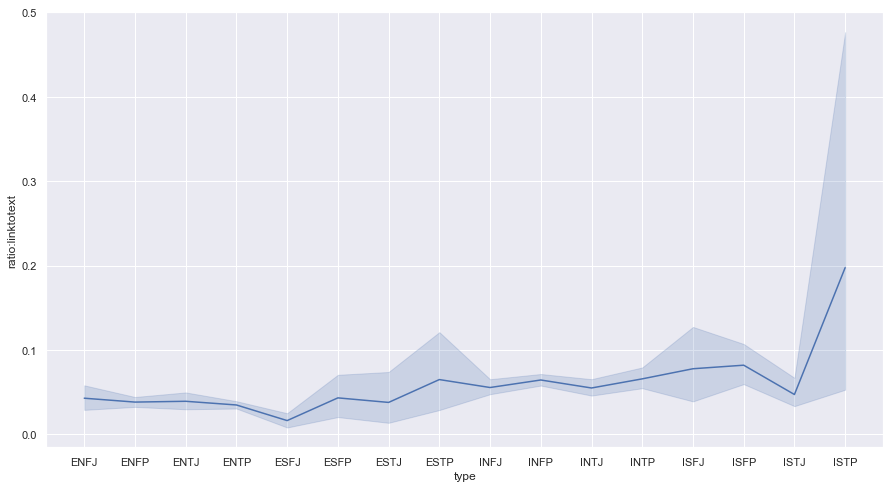

In [20]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x="type", y="ratio:linktotext", data=df, sizes=(10,10))

In [21]:
def ratio_of_link_post(inposts):
    d=inposts.split('|||')
    t=[]
    count=0
    for txt in d:
        t.extend(txt.split('  '))
    for text in t: 
        if 'http' in text:
            #print(text,'\n')
            count+=1
    txtlen=len(t)   
    return count/(txtlen)

In [22]:
df['ratio:linktoPOST']=np.vectorize(ratio_of_link_post)(df['posts'])

In [23]:
df

,type,posts,no.of.links,c1,c2,c3,c4,ratio:linktotext,ratio:linktoPOST
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,24,I,N,F,J,0.533333,0.347826
1,ENTP,'I'm finding the lack of me in these posts ver...,7,E,N,T,P,0.106061,0.095890
2,INTP,'Good one _____ https://www.youtube.com/wat...,5,I,N,T,P,0.071429,0.066667
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",2,I,N,T,J,0.025316,0.024691
4,ENTJ,'You're fired.|||That's another silly misconce...,6,E,N,T,J,0.100000,0.090909
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,1,I,N,T,J,0.010638,0.010526
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",2,I,N,F,J,0.024691,0.024096
7,INTJ,'I tend to build up a collection of things on ...,1,I,N,T,J,0.012048,0.011905
8,INFJ,"I'm not sure, that's a good question. The dist...",23,I,N,F,J,0.621622,0.383333
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,7,I,N,T,P,0.104478,0.094595


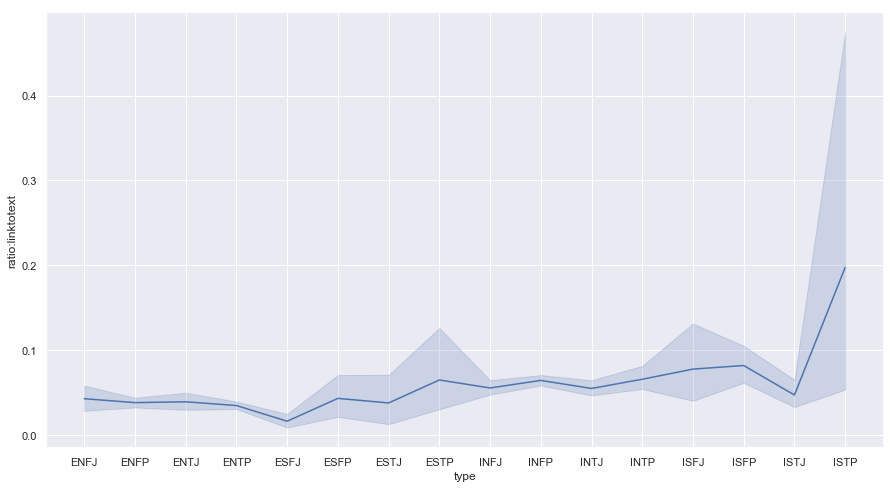

In [24]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x="type", y="ratio:linktotext", data=df, sizes=(10,10))

In [5]:
mbti1=pd.DataFrame(columns=['type','tweet'])
counter=len(df.index)

In [6]:
def trans(type,inposts):
    
    d=inposts.split('|||')
    #t=[]
    for txt in d:
        insert_loc = mbti1.index.max()
        #print(txt)
        if np.isnan(insert_loc):
            mbti1.loc[0] = [type,txt]
        else:
            mbti1.loc[insert_loc + 1] = [type,txt]

In [7]:
import time
t0 = time.time()

In [8]:
for i in range(0,counter):
    trans(df.iloc[i][0],df.iloc[i][1])

KeyboardInterrupt: 

In [9]:
t1 = time.time()
total = t1-t0

In [10]:
total

327.7498104572296

In [11]:
mbti1

,type,tweet
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,enfp and intj moments https://www.youtube.com...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...
5,INFJ,May the PerC Experience immerse you.
6,INFJ,The last thing my INFJ friend posted on his fa...
7,INFJ,Hello ENFJ7. Sorry to hear of your distress. I...
8,INFJ,84389 84390 http://wallpaperpassion.com/uplo...
9,INFJ,Welcome and stuff.
